Caixeiro viajante
=================



## Introdução



Até agora, sempre que nós aplicamos os operadores de `cruzamento` ou de `mutação` nós não nos preocupamos se o indivíduo gerado por estes processo era um `indivíduo válido`. Um indivíduo válido é aquele que representa uma solução possível e bem formulada para o problema em questão.

Por exemplo, no problema das caixas binárias, [1, 0, 0, 1] é um indivíduo válido para o caso de termos 4 caixas. Um exemplo de `indivíduo inválido` para este mesmo problema seria [1, 0, 0, a], pois um dos genes está assumindo um valor fora do domínio. Outro exemplo de indivíduo inválido poderia ser [1, 1, 0], pois é um indivíduo com apenas 3 genes, sendo que o esperado eram 4 genes.

Neste experimento nós veremos estratégias para evitar que indivíduos inválidos sejam obtidos quando usamos os operadores de cruzamento e de mutação. No notebook seguinte veremos como aplicar uma penalidade para indivíduos inválidos que forem gerados durante uma busca genética com restrições.



## Objetivo



Encontrar uma solução para o problema do caixeiro viajante. Considere que ele irá visitar 5 cidades, pode iniciar sua viagem por qualquer uma destas cidades e deve retornar à cidade de início. Durante seu trajeto, não pode visitar a mesma cidade duas vezes (única exceção é a cidade inicial).



## Descrição do problema



O problema consiste em descobrir a rota de menor distância entre $n$ pontos no plano cartesiano (ou seja, $n$ pontos com coordenadas $(x,y)$). A rota pode se iniciar em qualquer um dos pontos disponíveis e deve terminar no ponto inicial, visitando todos os demais pontos apenas uma vez. Considere que a rota entre um ponto e outro é a linha reta que liga os dois pontos.

## Importações



In [1]:
import random
import matplotlib.pyplot as plt
from itertools import permutations
import networkx as nx
from funcoes import cria_cidades
from funcoes import populacao_inicial_cv
from funcoes import funcao_objetivo_cv as funcao_objetivo_individuo
from funcoes import funcao_objetivo_pop_cv
from funcoes import selecao_torneio_min
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao

## Códigos e discussão



In [2]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3
NUM_GERACOES = 150

# relacionadas ao problema a ser resolvido
CIDADES = cria_cidades(10)
NUM_GENES = len(CIDADES)

In [3]:
# funções locais (para não ter que colocar as variaveis locais no script
def cria_populacao_inicial(tamanho, nada):
    return populacao_inicial_cv(tamanho, CIDADES)

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def funcao_selecao(populacao, fitness):
    return selecao_torneio_min(populacao, fitness, NUM_COMBATENTES_NO_TORNEIO)

In [4]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, NUM_GENES)

melhor_fitness_ja_visto = float("inf")  # é assim que escrevemos infinito em python

lista_melhor_fitness = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    menor_fitness = min(fitness)
    if menor_fitness < melhor_fitness_ja_visto:        
        posicao = fitness.index(menor_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = menor_fitness    
    lista_melhor_fitness.append(melhor_fitness_ja_visto)

In [5]:
# Busca testando todas as permutações

melhor_fitness_ever = float("inf")

# testando todas as permutações possíveis
for caminho in permutations(list(CIDADES.keys())):
    distancia = funcao_objetivo_individuo(caminho, CIDADES)
    if distancia < melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho

In [6]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", melhor_fitness_ever)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 3', 'Cidade 7', 'Cidade 0', 'Cidade 6', 'Cidade 9', 'Cidade 4', 'Cidade 8', 'Cidade 2', 'Cidade 1', 'Cidade 5'] com distância: 2.701510707504623

Melhor individuo obtido por busca exaustiva:
('Cidade 2', 'Cidade 8', 'Cidade 4', 'Cidade 9', 'Cidade 6', 'Cidade 0', 'Cidade 7', 'Cidade 3', 'Cidade 5', 'Cidade 1') com distância: 2.701510707504623


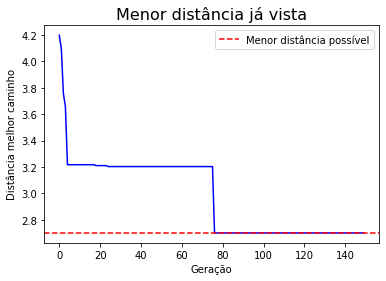

In [7]:
fig, ax = plt.subplots(1, 1)
ax.plot(range(NUM_GERACOES), lista_melhor_fitness, c="b")
ax.axhline(y=melhor_fitness_ever, c="r", linestyle="--", label="Menor distância possível")
ax.set_xlabel("Geração")
ax.set_ylabel("Distância melhor caminho")
ax.set_title("Menor distância já vista", fontsize=16)
ax.legend()

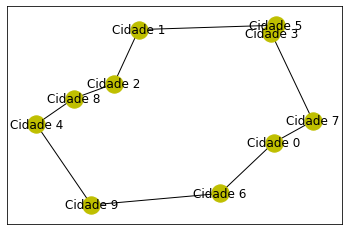

In [8]:
# Representação gráfica:
g = nx.Graph()
for i in list(CIDADES.keys()):
    g.add_node(i)
k = -1
while k < len(melhor_individuo_ja_visto)-1:
    g.add_edge(melhor_individuo_ja_visto[k], melhor_individuo_ja_visto[k+1])
    k+=1
vertices = CIDADES.keys()
pos = nx.spring_layout(g,pos=CIDADES, fixed = vertices)
nx.draw_networkx(g,pos,node_color = 'y')

Para resolver o problema, criamos um dicionário contendo as cidades e suas posições, e os indivíduos foram gerados a partir de uma função que sorteia possíveis ordens de visita das cidades. A função de mutação precisou ser adaptada para evitar a repetição de elementos, assim como o cruzamento não podia alterar os genes, mas apenas a ordem deles.
Para calcular a função objetivo, foi usada a distância percorrida no trajeto que corresponde a um indivíduo. A função de seleção usada foi a mesma que a do problema da senha.

Vale ressaltar que para n cidades, temos $(n-1)!$ permutações circulares, e cada uma possui dois sentidos opostos, logo o espaço de busca possui $\frac{(n-1)!}{2}$ indivíduos possíveis. No entanto, da maneira como implementamos, estamos considerando todas as permutações de n elementos, o nosso código está olhando para um espaço de n! indivíduos. Ou seja, no caso de 10 cidades, por exemplo, estamos olhando para um espaço que é 20 vezes maior que o necessário, portanto o código poderia ser modificado para otimizar isso.

## Conclusão



Concluo que o algoritmo genético foi muito eficiente para encontrar soluções para o problema do caixeiro viajante. Com 10 cidades apenas 150 gerações, observei que o algoritmo praticamente sempre chega ao melhor caminho. Um pensamento que esse experimento sucitou que eu não havia considerando antes é que, em alguns problemas, a maneira como estruturamos os dados pode ser redundante, fazendo com que percorremos um espaço de busca maior do que o necessário, como expliquei na discussão do experimento. Isso é algo que vou ter em mente nos experimentos futuros.